# Modeling data 1

Machine learning and data science is about modeling data. **Modeling** is the representation of an idea with some parameters and  a mathematical representation which we will encode in software. All machine learning methods are about training a computer to fit a model to some data. Even the fanciest neural networks are simply choices for models. In this notebook, we will begin to start building our first computational model of data.

## Modeling data is hard!

Let's pick up where we left off in notebook 1 with fruit. We were left with a riddle: when we load images of apples and bananas,

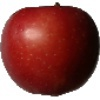

In [1]:
using Images

apple = load("data/10_100.jpg")

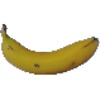

In [2]:
banana = load("data/104_100.jpg")

and then compare their average value for the color red, we end up with something that is perhaps surprising:

In [4]:
using Statistics

apple_red_amount = mean(Float64.(red.(apple)))
banana_red_amount = mean(Float64.(red.(banana)));

"The average value of red in the apple is $apple_red_amount, " *
"while the average value of red in the banana is $banana_red_amount."

"The average value of red in the apple is 0.5701670588235295, while the average value of red in the banana is 0.9040168627450981."

We see that the banana's mean red value is higher than the apple's, even though the apple looks much redder. Can you guess why? 

There are actually two reasons. One of the reasons is the background: the image of the banana has a lot more white background than the apple, and that white background has a red value of 1! In our minds we ignore the background and say "the banana is bright yellow, the apple is dark red", but a computer just has a bundle of numbers and does not know where it should be looking.

The other issue is that "bright yellow" isn't a color that exists in a computer. The computer has three colors: red, green, and blue. "Bright yellow" in a computer is a mixture of red and green, and it just so happens that to get this color yellow, it needs more red than the apple!

In [5]:
"The amount of red in the apple at (60, 60) is $(Float64(red(apple[60, 60]))), " *
"while the amount of red in the banana at (60, 60) is $(Float64(red(banana[60, 60])))."

"The amount of red in the apple at (60, 60) is 0.4470588235294118, while the amount of red in the banana at (60, 60) is 0.6666666666666666."

In [6]:
apple[60,60]

In [7]:
banana[60,60]

This is a clear example that modeling data is hard!

### A note on string interpolation

In the last two input cells, we *interpolated a string*. This means that when we write the string using quotation marks (`"  "`), we insert a placeholder for some **value** we want the string to include. When the string is evaluated, the value we want the string to include replaces the placeholder. For example, in the following string,

```julia
mystring = "The average value of red in the apple is $apple_red_amount"
```

`$apple_red_amount` is a placeholder for the value stored in the variable `apple_red_amount`. Julia knows that we want to use the value bound to the variable `apple_red_amount` and *not* the word "apple_red_amount" because of the dollar sign, `$`, that comes before `apple_red_amount`.

#### Exercise 1

Execute the following code to see what the dollar sign does:

```julia
mypi = 3.14159
println("I have a variable called mypi that has a value of $mypi.")
```

#### Exercise 2

Alter and execute the code that creates `mystring` below 

```julia
apple_blue_amount = mean(Float64.(blue.(apple)))
mystring = "The average amount of blue in the apple is apple_blue_amount"
```

so that `println(mystring)` prints a string that reports the mean value of blue coloration in our image of an apple.

In [8]:
apple_blue_amount = mean(Float64.(blue.(apple)))
mystring = "The average amount of blue in the apple is $apple_blue_amount"

"The average amount of blue in the apple is 0.3224674509803921"

## Take some time to think about the data

Apples and bananas are very different, but how could we use the array of RGB values (which is how the images are represented in the computer, as we saw in notebook 1) to tell the difference between the two? Here are some quick ideas:

- We could use the shape of the object in the image. But how can we encode ideas about shape from an array?
- We could use the size of the object in the image. But how do we calculate that size?
- We could use another color, or combinations of colors, from the image. Which colors?

Let's go with the last route. The banana is yellow, which is a combination of red and green, while the apple is red. This means that the color that clearly differentiates between the two is not red, but green!

In [9]:
apple_green_amount = mean(Float64.(green.(apple)))
banana_green_amount = mean(Float64.(green.(banana)));

"The average value of green in the apple is $apple_green_amount, " *
"while the average value of green in the banana is $banana_green_amount."

"The average value of green in the apple is 0.33821137254901956, while the average value of green in the banana is 0.8807960784313724."

The processes that we just went through are assigned fancy names: feature selection and data munging. 

**Feature selection** is the process of subsetting the data to a more relevant and informative set. We took the full image data and decided to select out the green channel. 

**Data munging** is transforming the data into a format more suitable for modeling. Here, instead of keeping the full green channel, we transformed it down to a single data point: the average amount of green.

## Building a model

We want to model the connection between "the average amount of green" and "is an apple or banana". 

<img src="data/data_flow.png" alt="Drawing" style="width: 800px;"/>

This model is a mathematical function which takes in our data and spits out a number that we will interpret as "is an apple" or "is a banana".

<img src="data/what_is_model.png" alt="Drawing" style="width: 500px;"/>


We will interpret the output of the function as "is an apple" if the output is close to 0, and "is a banana" if it's close to 1. Anything in the middle is something we are unsure about. Here we're using a mathematical function to perform a **classification**.

Knowing how to declare and work with functions will allow us to model our data in the coming sections, so this is the subject of the next notebook!